## San Francisco Restaurant Reviews Natural Language Processing Stage
### Darren Lyles

<p>In the following notebook, we will use natural langage processing funamentals to clean up the reviews and add new features to the data set. Ultimately we will clean up the reviews by tokenizing them and adding a new column. We will then do some EDA to get a better understanding of the dataset features.</p>

In [1]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_restaurant_reviews = pd.read_csv('restaurant_reviews.csv', index_col=0)
df_restaurant_reviews.head()

,name,cuisine,address,locality,region,hours,email,tel,fax,trip_advisor_url,website,latitude,longitude,price,rating,review_url,review_title,review_text,review_rating,review_date
0,21st Amendment Brewery & Restaurant,"['Cafe', 'Pub Food', 'American', 'Burgers', 'P...",563 2nd St,San Francisco,CA,"{'monday': [['11:30', '23:59']], 'tuesday': [[...",new-pub@21st-amendment.com,(415) 369-0900,(415) 369-0909,http://www.tripadvisor.com/Restaurant_Review-g...,http://www.21st-amendment.com,37.782448,-122.392576,2,4.0,https://www.tripadvisor.com/ShowUserReviews-g6...,Great drinks and food,They have great local craft beers and probably...,4,"Mar 28, 2016 12:00:00 AM"
1,21st Amendment Brewery & Restaurant,"['Cafe', 'Pub Food', 'American', 'Burgers', 'P...",563 2nd St,San Francisco,CA,"{'monday': [['11:30', '23:59']], 'tuesday': [[...",new-pub@21st-amendment.com,(415) 369-0900,(415) 369-0909,http://www.tripadvisor.com/Restaurant_Review-g...,http://www.21st-amendment.com,37.782448,-122.392576,2,4.0,https://www.tripadvisor.com/ShowUserReviews-g6...,Good food &amp; beer,We went to the downtown SF location. The resta...,4,"Mar 27, 2016 12:00:00 AM"
2,21st Amendment Brewery & Restaurant,"['Cafe', 'Pub Food', 'American', 'Burgers', 'P...",563 2nd St,San Francisco,CA,"{'monday': [['11:30', '23:59']], 'tuesday': [[...",new-pub@21st-amendment.com,(415) 369-0900,(415) 369-0909,http://www.tripadvisor.com/Restaurant_Review-g...,http://www.21st-amendment.com,37.782448,-122.392576,2,4.0,https://www.tripadvisor.com/ShowUserReviews-g6...,Pretty good beers,I just came to this place for drinks with an o...,4,"Mar 16, 2016 12:00:00 AM"
3,21st Amendment Brewery & Restaurant,"['Cafe', 'Pub Food', 'American', 'Burgers', 'P...",563 2nd St,San Francisco,CA,"{'monday': [['11:30', '23:59']], 'tuesday': [[...",new-pub@21st-amendment.com,(415) 369-0900,(415) 369-0909,http://www.tripadvisor.com/Restaurant_Review-g...,http://www.21st-amendment.com,37.782448,-122.392576,2,4.0,https://www.tripadvisor.com/ShowUserReviews-g6...,Ridiculously overpriced (yes I live in SF),"Mediocre food (not bad, just mediocre, you can...",3,"Mar 8, 2016 12:00:00 AM"
4,21st Amendment Brewery & Restaurant,"['Cafe', 'Pub Food', 'American', 'Burgers', 'P...",563 2nd St,San Francisco,CA,"{'monday': [['11:30', '23:59']], 'tuesday': [[...",new-pub@21st-amendment.com,(415) 369-0900,(415) 369-0909,http://www.tripadvisor.com/Restaurant_Review-g...,http://www.21st-amendment.com,37.782448,-122.392576,2,4.0,https://www.tripadvisor.com/ShowUserReviews-g6...,Team dinner,We headed out for our team dinner to this esta...,4,"Mar 1, 2016 12:00:00 AM"


<p>Below, I am applying preprocessing techniques to each review in our dataset.
   The first step that needs to be done is to set each string review into the lowercase,
   then I tokenize each review such that each word is an element in a list.
   The last three steps I took was to filter out stopwords, punctuation, and finally
   lemmatize each word in each review.
</p>

In [105]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from string import punctuation

#Set all words in each review in the lower case
df_restaurant_reviews['tokenized_review_text'] = df_restaurant_reviews.review_text.str.lower()

#Tokenize all Restaurant Reviews
df_restaurant_reviews['tokenized_review_text'] = \
df_restaurant_reviews['tokenized_review_text'].apply(lambda x: word_tokenize(x))

#Filter out stopwords
sw = set(stopwords.words('english'))
df_restaurant_reviews['tokenized_review_text'] = \
df_restaurant_reviews['tokenized_review_text'].apply(lambda x: [y for y in x if y not in sw])

#Filter out punctuation
df_restaurant_reviews['tokenized_review_text'] = \
df_restaurant_reviews['tokenized_review_text'].apply(lambda x: [y for y in x if y not in punctuation])

#Lemmatize each word for each review
wordnet_lemmatizer = WordNetLemmatizer()
df_restaurant_reviews['tokenized_review_text'] = \
df_restaurant_reviews['tokenized_review_text'].apply(lambda x: [wordnet_lemmatizer.lemmatize(w) for w in x])

df_restaurant_reviews.to_csv('restaurant_reviews_tokenized.csv')
df_restaurant_reviews.head()

,name,cuisine,address,locality,region,hours,email,tel,fax,trip_advisor_url,...,latitude,longitude,price,rating,review_url,review_title,review_text,review_rating,review_date,tokenized_review_text
0,21st Amendment Brewery & Restaurant,"['Cafe', 'Pub Food', 'American', 'Burgers', 'P...",563 2nd St,San Francisco,CA,"{'monday': [['11:30', '23:59']], 'tuesday': [[...",new-pub@21st-amendment.com,(415) 369-0900,(415) 369-0909,http://www.tripadvisor.com/Restaurant_Review-g...,...,37.782448,-122.392576,2,4.0,https://www.tripadvisor.com/ShowUserReviews-g6...,Great drinks and food,They have great local craft beers and probably...,4,"Mar 28, 2016 12:00:00 AM","[great, local, craft, beer, probably, one, bes..."
1,21st Amendment Brewery & Restaurant,"['Cafe', 'Pub Food', 'American', 'Burgers', 'P...",563 2nd St,San Francisco,CA,"{'monday': [['11:30', '23:59']], 'tuesday': [[...",new-pub@21st-amendment.com,(415) 369-0900,(415) 369-0909,http://www.tripadvisor.com/Restaurant_Review-g...,...,37.782448,-122.392576,2,4.0,https://www.tripadvisor.com/ShowUserReviews-g6...,Good food &amp; beer,We went to the downtown SF location. The resta...,4,"Mar 27, 2016 12:00:00 AM","[went, downtown, sf, location, restaurant, rea..."
2,21st Amendment Brewery & Restaurant,"['Cafe', 'Pub Food', 'American', 'Burgers', 'P...",563 2nd St,San Francisco,CA,"{'monday': [['11:30', '23:59']], 'tuesday': [[...",new-pub@21st-amendment.com,(415) 369-0900,(415) 369-0909,http://www.tripadvisor.com/Restaurant_Review-g...,...,37.782448,-122.392576,2,4.0,https://www.tripadvisor.com/ShowUserReviews-g6...,Pretty good beers,I just came to this place for drinks with an o...,4,"Mar 16, 2016 12:00:00 AM","[came, place, drink, old, colleague, beer, pre..."
3,21st Amendment Brewery & Restaurant,"['Cafe', 'Pub Food', 'American', 'Burgers', 'P...",563 2nd St,San Francisco,CA,"{'monday': [['11:30', '23:59']], 'tuesday': [[...",new-pub@21st-amendment.com,(415) 369-0900,(415) 369-0909,http://www.tripadvisor.com/Restaurant_Review-g...,...,37.782448,-122.392576,2,4.0,https://www.tripadvisor.com/ShowUserReviews-g6...,Ridiculously overpriced (yes I live in SF),"Mediocre food (not bad, just mediocre, you can...",3,"Mar 8, 2016 12:00:00 AM","[mediocre, food, bad, mediocre, find, food, pr..."
4,21st Amendment Brewery & Restaurant,"['Cafe', 'Pub Food', 'American', 'Burgers', 'P...",563 2nd St,San Francisco,CA,"{'monday': [['11:30', '23:59']], 'tuesday': [[...",new-pub@21st-amendment.com,(415) 369-0900,(415) 369-0909,http://www.tripadvisor.com/Restaurant_Review-g...,...,37.782448,-122.392576,2,4.0,https://www.tripadvisor.com/ShowUserReviews-g6...,Team dinner,We headed out for our team dinner to this esta...,4,"Mar 1, 2016 12:00:00 AM","[headed, team, dinner, establishment, lot, goo..."


<p>
    Now that we have our dataset ready for natural language processing and analysis, let us explore some of the features.
</p>

In [4]:
df_restaurant_reviews.describe()

,latitude,longitude,price,rating,review_rating
count,16500.000000,16500.000000,16500.000000,16500.000000,16500.000000
mean,37.782760,-122.421066,1.951515,4.000000,4.228242
std,0.016237,0.021871,0.658816,0.433463,0.966448
min,37.732046,-122.513899,1.000000,2.500000,1.000000
25%,37.768755,-122.430158,2.000000,4.000000,4.000000
50%,37.786022,-122.418143,2.000000,4.000000,4.000000
75%,37.795132,-122.407559,2.000000,4.000000,5.000000
max,37.809470,-122.388432,4.000000,5.000000,5.000000


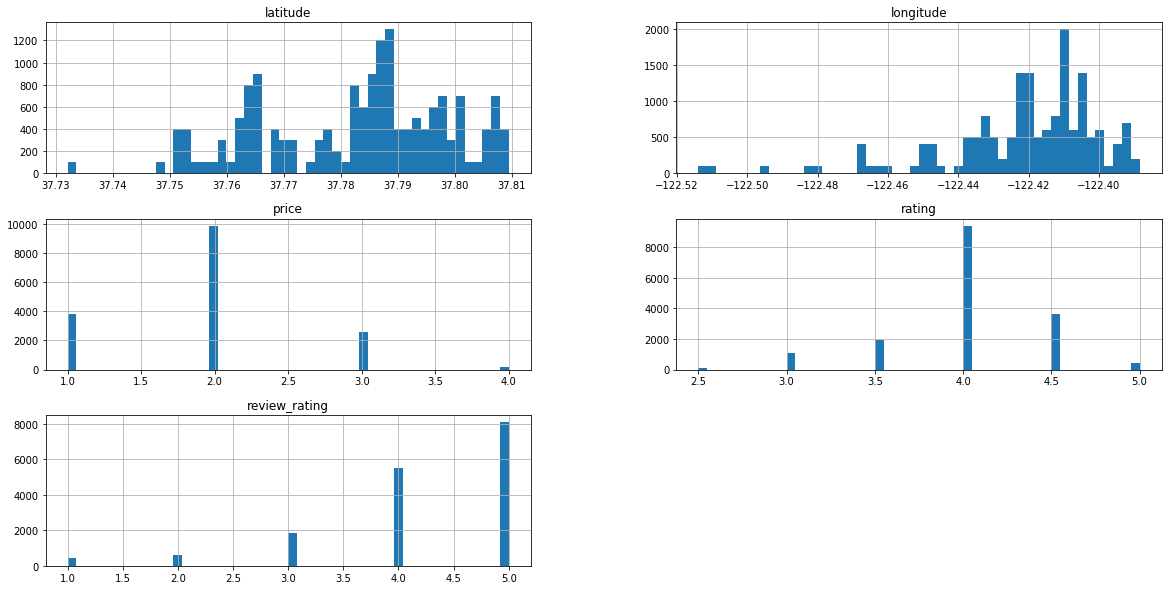

In [5]:
df_restaurant_reviews.hist(bins=50, figsize=(20,10))
plt.show()

<p>
    The histograms plotted above contain the distributions of the numerical features of the data set. For our scope of interest, the latitude and longitude distribution does not matter. However, the pricce, restaurant rating, and review rating distribuions can give us a better understanding on how restaurants in San Francisco are rated. Overall there are more 5 star review ratings than any other ratings, and most of the restaurants reviewed had two dollar signs.
</p>

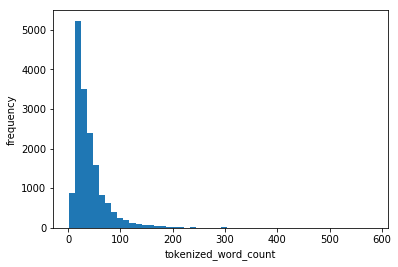

MIN:    1
MAX:    583
MEAN:   41.1
MEDIAN: 31.0
STD:    35.5


In [6]:
review_length = df_restaurant_reviews['tokenized_review_text'].apply(len)
plt.hist(review_length, bins=50)
plt.xlabel('tokenized_word_count')
plt.ylabel('frequency')
plt.show()

print("MIN:    {}".format(review_length.min()))
print("MAX:    {}".format(review_length.max()))
print("MEAN:   {}".format(round(review_length.mean(), 1)))
print("MEDIAN: {}".format(round(review_length.median(), 1)))
print("STD:    {}".format(round(review_length.std(), 1)))

<p>
    The distribution above shows the frequency of tokenized word counts for all reviews. The median tokenized review length is 31 while the mean tokenized word length is 41.1.
</p>

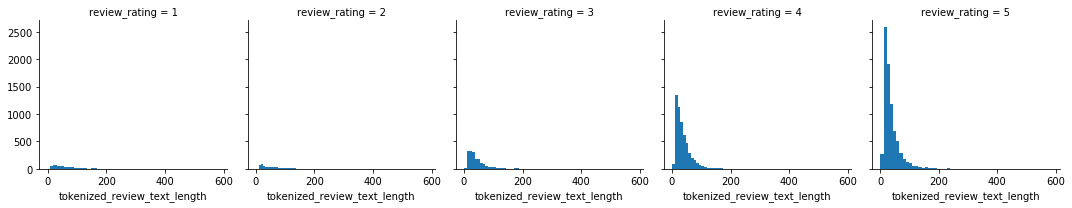

,tokenized_review_text_length
review_rating,
1,436
2,601
3,1833
4,5521
5,8109


In [26]:
import seaborn as sns

reviews_and_ratings = pd.DataFrame()
reviews_and_ratings['review_rating'] = df_restaurant_reviews['review_rating']
reviews_and_ratings['tokenized_review_text_length'] = review_length

g = sns.FacetGrid(data=reviews_and_ratings, col='review_rating')
g.map(plt.hist, 'tokenized_review_text_length', bins=50)
plt.show()

reviews_and_ratings.groupby('review_rating').count()

<p>
    The distributions illustrate the relationship between the restaurant reviewer's rating and the review given.
    Here we have the distribution of the tokenized review text length. We see that there is a significantly higher 
    frequency of highly reveiwed restaurants as opposed to restaurants given a review rating of 1, 2, or 3. The 
    range for the number of tokenized words used across all restaurant ratings is given below.
</p>

In [104]:
reviews_and_ratings.groupby('review_rating').apply(lambda x: x.max() - x.min()) \
.drop(columns='review_rating') \
.rename(columns={'tokenized_review_text_length': 'tokenized_review_text_length_range'})
#print(reviews_and_ratings.groupby('review_rating').max())
#print(reviews_and_ratings.groupby('review_rating').min())

,tokenized_review_text_length_range
review_rating,
1,575
2,356
3,447
4,453
5,540


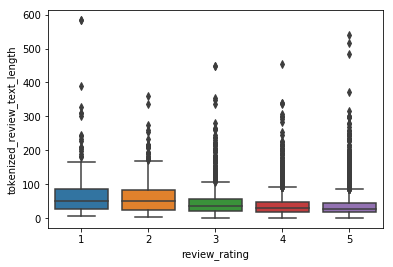

In [29]:
sns.boxplot(x='review_rating', y='tokenized_review_text_length', data=reviews_and_ratings)
plt.show()

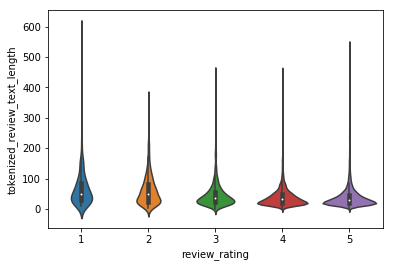

In [28]:
sns.violinplot(x='review_rating', y='tokenized_review_text_length', data=reviews_and_ratings)
plt.show()

<p>
    The box and violin plots above show how the tokenized review lengh differes across each restaurant rating.
</p>

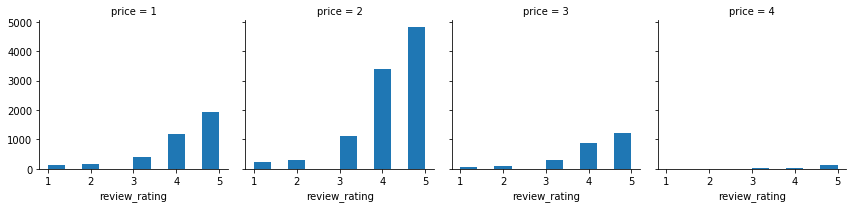

In [58]:
g = sns.FacetGrid(data=df_restaurant_reviews, col='price')
g.map(plt.hist, 'review_rating', bins=10)
plt.show()

<p>
    The following plots shows the number of ratings with respect to the price. It seems that resaturant reviewers 
    in San Francisco tend to go to restaurants with two dollar signs. Not only that, but two dollar sign
    restaurants have the highest number of 5 star ratings than any other restaurants. This should not however, 
    imply that the more 5 star restaurant ratings, the better. This is an example of 
    voluntary response bias since not every person rates and reviews a restaurant they visited, and the frequency 
    of restaurant reviewers for each restaurant is not uniform.  This means the number of reviewers for each 
    restaurant is not the same in general.
</p>